In [8]:
import pandas as pd

from matplotlib import pyplot as plt

data_path = './data'

In [9]:
raw_train = pd.read_csv('{}/train.csv'.format(data_path), sep='\t')
raw_test = pd.read_csv('{}/test.csv'.format(data_path), sep='\t')

In [5]:
print(raw_train.shape, raw_test.shape)

(200000, 2) (50000, 1)


In [6]:
raw_train.head()
# 按照空格split

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [11]:
# train和test的新闻长度
train_lens = raw_train['text'].apply(lambda x: len(x.split()))
test_lens = raw_test['text'].apply(lambda x: len(x.split()))

In [25]:
print(train_lens.describe())
print(test_lens.describe())

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text, dtype: float64
count    50000.000000
mean       909.844960
std       1032.313375
min         14.000000
25%        370.000000
50%        676.000000
75%       1133.000000
max      41861.000000
Name: text, dtype: float64


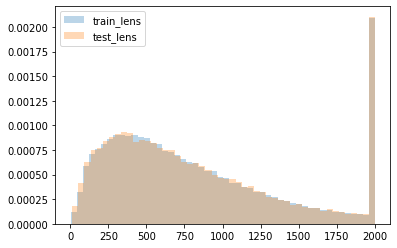

In [26]:
train_lens = train_lens.apply(lambda x: x if x < 2000 else 2000)
test_lens = test_lens.apply(lambda x: x if x < 2000 else 2000)
plt.hist(train_lens, bins=50, density=True, alpha=0.3)
plt.hist(test_lens, bins=50, density=True, alpha=0.3)
plt.legend(['train_lens', 'test_lens'])
# train和test分布应该一致

In [7]:
# train各个类别数量 & 占比
print(raw_train['label'].value_counts())
print(raw_train['label'].value_counts() / raw_train.shape[0] * 100)

0     38918
1     36945
2     31425
3     22133
4     15016
5     12232
6      9985
7      8841
8      7847
9      5878
10     4920
11     3131
12     1821
13      908
Name: label, dtype: int64
0     19.4590
1     18.4725
2     15.7125
3     11.0665
4      7.5080
5      6.1160
6      4.9925
7      4.4205
8      3.9235
9      2.9390
10     2.4600
11     1.5655
12     0.9105
13     0.4540
Name: label, dtype: float64


In [37]:
# 各个类别的新闻长度分布
raw_train['lens'] = train_lens

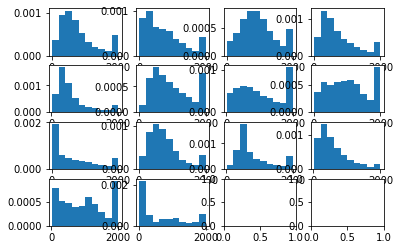

In [39]:
_, ax = plt.subplots(4, 4)
for label in range(14):
    x = label // 4
    y = label % 4
    ax[x][y].hist(raw_train['lens'][raw_train['label'] == label], density=True)
# 各个类别的新闻长度分布不太一致

In [44]:
# 词典大小
train_word_set = set()
for text in raw_train['text']:
    for word in text.split():
        train_word_set.add(word)
test_word_set = set()
for text in raw_test['text']:
    for word in text.split():
        test_word_set.add(word) 


In [46]:
# train
print(len(train_word_set))
# test
print(len(test_word_set))
# train union test
print(len(train_word_set.union(test_word_set)))
# 有100多个词在test中出现但是并为在train中出现

6869
6203
6977


有关是否要将val和test加入train进行词频统计或tf-idf等
* 词频：加入和不加入都无所谓，因为词频只看一条新闻中的词频，如果某个词在train中没有出现，但是在test和val出现了，那么即便是向量化的时候长度会增加，但是增加的位置在train中都是0，无所谓
* tf-idf：加入会影响某个词在doc中出现的频率，算是包含一些val和test的信息，但是由于val的label没有泄漏，所以问题不大，而且可能把val和test的text加进去效果更好
* word2vec或预训练模型：无监督，不泄漏label，加进去效果更好，val和test加进去相当于学出来的知识更多，但是在实际生产环境中test连text都不可见，这时候就不能把val加进去。

总结：无论什么时候，都不能泄漏val的label，但是val和test的features是可以利用的，相当于更好地提取信息。

In [56]:
import numpy as np
a = np.array([1, 2, 3, 4, 5, 6])